In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
path='ex1data1.txt'
data=pd.read_csv(path,header=None,names=['Population','Profit'])#data初始化
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [78]:
data.describe()#数据的基本情况

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


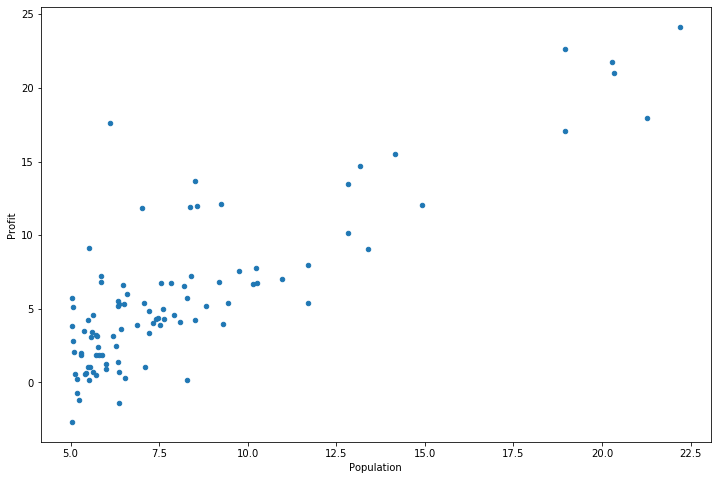

In [79]:
#绘制
data.plot(kind="scatter",x='Population',y='Profit',figsize=(12,8))
plt.show()

In [80]:
def computeCost(X,y,theta):
    inner=np.power((X*theta.T-y),2)
    return np.sum(inner)/(2*len(X))

In [81]:
data.insert(0,'One',1)

In [82]:
cols=data.shape[1]
X=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]

In [83]:
X.head()

,One,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [84]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [85]:
#矩阵初始化
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [86]:
X.shape,y.shape,theta.shape,

((97, 2), (97, 1), (1, 2))

In [87]:
theta.ravel().shape[1]

2

In [88]:
#代价函数
computeCost(X,y,theta)

32.072733877455676

In [89]:
#梯度下降
def gradientDescent(X,y,theta,alpha,iters):
    temp=np.matrix(np.zeros(theta.shape))
    parameters=int(theta.ravel().shape[1])
    cost=np.zeros(iters)
    for i in range(iters):
        error=(X*theta.T)-y
        for j in range(parameters):
            term=np.multiply(error,X[:,j])#偏导数*x(i)(系数)
            temp[0,j]=theta[0,j]-(alpha/len(X))*np.sum(term)
        theta=temp#同步更新
        cost[i] = computeCost(X, y, theta)#储存迭代后的代价
    return theta,cost

In [90]:
alpha=0.01
iters=1005

In [91]:
g,cost=gradientDescent(X,y,theta,alpha,iters)
g#theta0 & theta1

matrix([[-3.24727882,  1.12788458]])

In [92]:
computeCost(X,y,g)

4.51525844980944

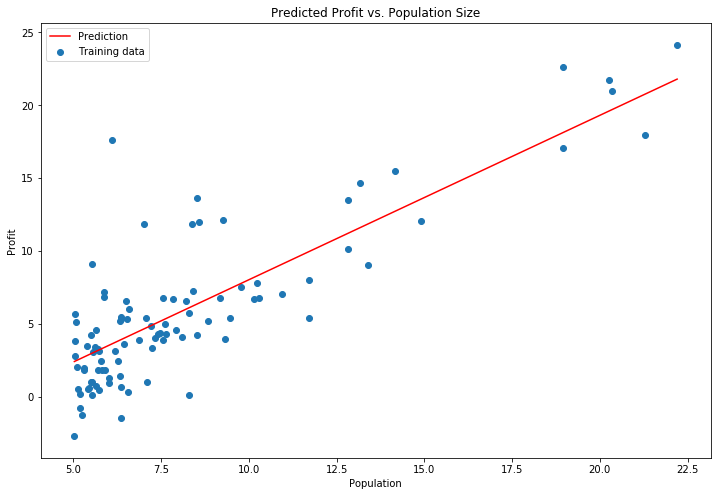

In [93]:
x=np.linspace(data.Population.min(),data.Population.max(),100)
f=g[0,0]+g[0,1]*x

fig,ax=plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data.Population,data.Profit,label='Training data')
ax.legend(loc='2')
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

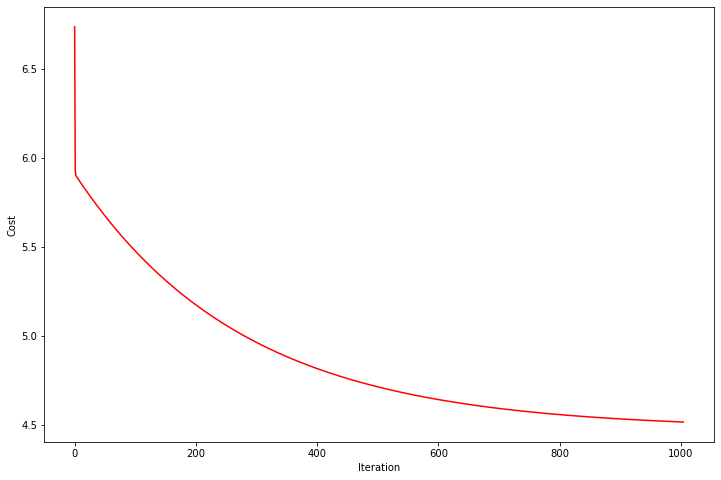

In [94]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(np.arange(iter),cost,'r')
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
plt.show()

In [95]:
path='ex1data2.txt'
data2=pd.read_csv(path,header=None,names=['Size','Bedrooms','Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [96]:
data2 = (data2 - data2.mean()) / data2.std()#特征归一化
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [97]:
data2.insert(0,'One',1)#常数项
cols2=data2.shape[1]
X2=data2.iloc[:,0:cols2-1]
y2=data2.iloc[:,cols2-1:cols2]
X2.head()

,One,Size,Bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [98]:
y2.head()

,Price
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


In [99]:
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
ntheta = np.matrix(np.array([0,0,0]))

In [110]:
computeCost(X2,y2,ntheta)
iters2=1000
nalpha=0.01

In [111]:
g,cost2=gradientDescent(X2,y2,ntheta,nalpha,iters2)
g

matrix([[-1.10910099e-16,  8.78503652e-01, -4.69166570e-02]])

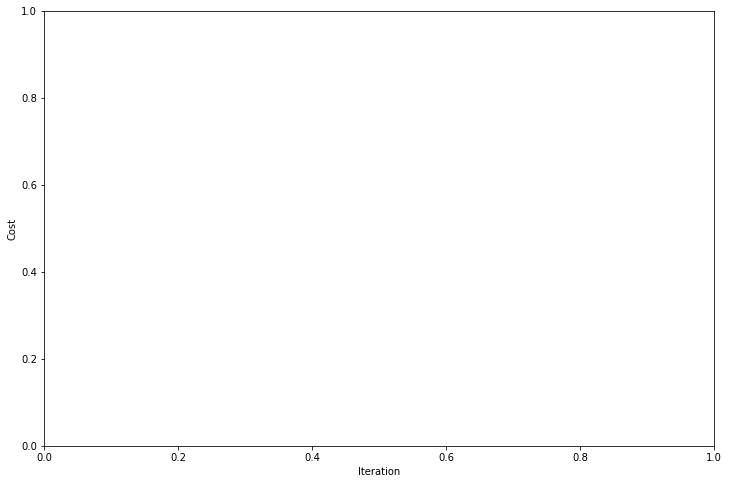

In [112]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot=(np.arange(iters2),cost2,'r')
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
plt.show()